Final Project - The Big Mac Index

Description:
The Big Mac Index (BMI) is a widely known gauge for comparing the consumer purchasing power between countries. The purpose of this project is to examine the correlation between the BMI and the Consumer Price Index (CPI).

Null Hypothesis: There is no correlation between BMI and CPI
Alternative Hypothesis: There is some correlation between BMI and CPI

Data Sets:

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
BMI_raw = pd.read_csv("data/big-mac-index.csv")
BMI_raw.head()

,Country,Date,Local price,Dollar ex,Dollar price,Dollar PPP,Dollar valuation
0,Argentina,1/4/2000,2.50,1.00,2.50,0.996016,-0.398406
1,Argentina,1/4/2001,2.50,1.00,2.50,0.984252,-1.574803
2,Argentina,1/4/2002,2.50,3.13,0.78,1.004016,-67.922809
3,Argentina,1/4/2003,4.10,2.88,1.40,1.512915,-47.468225
4,Argentina,1/5/2004,4.36,2.95,1.48,1.503448,-49.035652


Big Mac Index Data from 2010 to 2016
(Source: The Economist via (https://github.com/zelima/big-mac-index/blob/master/data/big-mac-index.csv)

In [3]:
CPI = pd.read_csv("data/WHO CPI Data.csv")
CPI.head()

,Country,Year,CPI (2010)
0,Aruba,2010,100.000000
1,Aruba,2011,104.374596
2,Aruba,2012,104.971363
3,Aruba,2013,102.481166
4,Aruba,2014,102.912610


Consumer Price Index Data (2010 = 100) from 2010 to 2016
(Source: http://data.worldbank.org/indicator/FP.CPI.TOTL)

Exploratory Data Analysis:

The data requires merging to based on country and year

In [4]:
BMI_raw['Date'] = pd.to_datetime(BMI_raw['Date'], dayfirst=True)
BMI_raw['Year']= BMI_raw['Date'].dt.year
BMI_raw.head()

,Country,Date,Local price,Dollar ex,Dollar price,Dollar PPP,Dollar valuation,Year
0,Argentina,2000-04-01,2.50,1.00,2.50,0.996016,-0.398406,2000
1,Argentina,2001-04-01,2.50,1.00,2.50,0.984252,-1.574803,2001
2,Argentina,2002-04-01,2.50,3.13,0.78,1.004016,-67.922809,2002
3,Argentina,2003-04-01,4.10,2.88,1.40,1.512915,-47.468225,2003
4,Argentina,2004-05-01,4.36,2.95,1.48,1.503448,-49.035652,2004


In [5]:
BMI = pd.merge(BMI_raw,CPI, how="left", left_on=["Country","Year"], right_on=["Country","Year"])
bmi_df = BMI.dropna()
bmi_df.head()

,Country,Date,Local price,Dollar ex,Dollar price,Dollar PPP,Dollar valuation,Year,CPI (2010)
36,Australia,2010-01-01,4.35,1.093550,3.977870,1.215084,11.113694,2010,100.00000
37,Australia,2010-07-01,4.35,1.133723,3.836918,1.165179,2.774576,2010,100.00000
38,Australia,2011-07-01,4.56,0.922382,4.943724,1.121771,21.616827,2011,103.30385
39,Australia,2012-01-01,4.80,0.972337,4.936560,1.143614,17.614993,2012,105.12487
40,Australia,2012-07-01,4.56,0.974326,4.680156,1.053726,8.149185,2012,105.12487


In [6]:
bmi_df.shape

(534, 9)

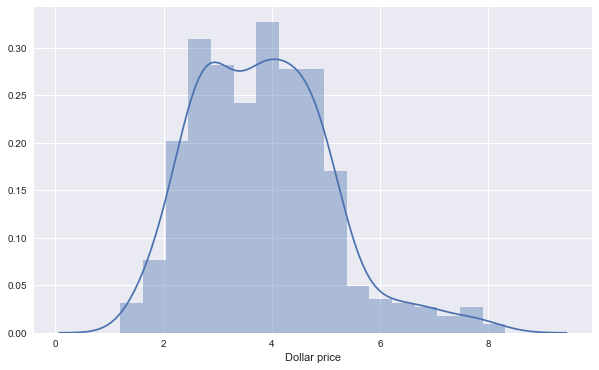

In [7]:
plt.figure(figsize=(10,6))
sns.distplot(bmi_df["Dollar price"])
plt.show()

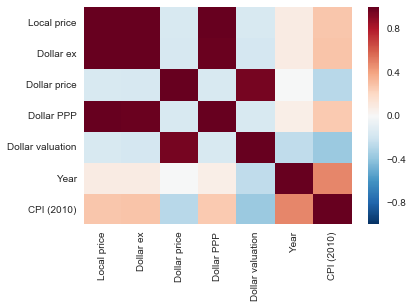

In [10]:
sns.heatmap(bmi_df.corr())

In [11]:
bmi_df.corr()

,Local price,Dollar ex,Dollar price,Dollar PPP,Dollar valuation,Year,CPI (2010)
Local price,1.000000,0.994010,-0.157123,0.997423,-0.162863,0.079277,0.278922
Dollar ex,0.994010,1.000000,-0.170749,0.991492,-0.176702,0.084576,0.281757
Dollar price,-0.157123,-0.170749,1.000000,-0.159330,0.959465,-0.003989,-0.275665
Dollar PPP,0.997423,0.991492,-0.159330,1.000000,-0.161361,0.063187,0.265536
Dollar valuation,-0.162863,-0.176702,0.959465,-0.161361,1.000000,-0.256256,-0.372239
Year,0.079277,0.084576,-0.003989,0.063187,-0.256256,1.000000,0.491563
CPI (2010),0.278922,0.281757,-0.275665,0.265536,-0.372239,0.491563,1.000000
